In [1]:
import numpy as np
import pandas as pd
import math
import scipy.stats

import matplotlib
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

In [2]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

/Users/Amiros/anaconda/lib/python3.5/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension as a python package.
  "as a python package.", UserWarning)


Installed autotime.py. To use it, type:
  %load_ext autotime


In [3]:
#load train data as numpy array
X_train = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw2-data/X_train.csv',delimiter=',')
y_train = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw2-data/y_train.csv',delimiter=',')

#load test data as numpy array
X_test = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw2-data/X_test.csv',delimiter=',')
y_test = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw2-data/y_test.csv',delimiter=',')

time: 321 ms


In [4]:
# class index
index_0 = np.where(y_train == 0)[0]
index_1 = np.where(y_train == 1)[0]

# lengths
n = X_train.shape[0] 
n_0 = index_0.shape[0]
n_1 = index_1.shape[0]

# Calculate parameters for p(y), theta_Bern, and theta_Pareto
#pi_y = np.mean(y_train, axis=0)

pi_y_0 = index_0.shape[0]/n
pi_y_1 = index_1.shape[0]/n


theta_X_0_Bern = np.mean(X_train[index_0, 0:54], axis = 0)
theta_X_1_Bern = np.mean(X_train[index_1, 0:54], axis = 0)


theta_X_0_Pareto = n_0/np.log(X_train[index_0, 54:57]).sum(axis = 0)
theta_X_1_Pareto = n_1/np.log(X_train[index_1, 54:57]).sum(axis = 0)


# Concatenating parameters 
# theta_X_0 = np.concatenate((theta_X_0_Bern, theta_X_0_Pareto), axis=0)
# theta_X_1 = np.concatenate((theta_X_1_Bern, theta_X_1_Pareto), axis=0)

time: 28.3 ms


In [5]:
theta_X_0_Pareto, theta_X_1_Pareto

(array([ 1.51973529,  0.46178096,  0.25072408]),
 array([ 0.73311718,  0.27128743,  0.18592499]))

time: 7.58 ms


In [6]:
# Building Bayes classfier 
classifier = []

for i in range(X_test.shape[0]):
    Bern_0 = np.multiply(np.power(theta_X_0_Bern, X_test[i,0:54]), np.power(1-theta_X_0_Bern, 1-X_test[i,0:54])) 
    Bern_1 = np.multiply(np.power(theta_X_1_Bern, X_test[i,0:54]), np.power(1-theta_X_1_Bern, 1-X_test[i,0:54])) 

    Prato_0 = np.multiply(theta_X_0_Pareto, np.power(X_test[i, 54:57], -1-theta_X_0_Pareto))
    Prato_1 = np.multiply(theta_X_1_Pareto, np.power(X_test[i, 54:57], -1-theta_X_1_Pareto))


    full_row_0 = np.concatenate((Bern_0, Prato_0), axis = 0)
    full_row_1 = np.concatenate((Bern_1, Prato_1), axis = 0) 
    
#     
#     
    
    p = [np.prod(full_row_0) * pi_y_0, np.prod(full_row_1) * pi_y_1]
      
    classifier.append(p)

classifier_df = pd.DataFrame(classifier, columns=[0,1])


# Find the column name which has the maximum value for each row
y_predict = classifier_df.idxmax(axis=1).tolist()

time: 33.2 ms


In [7]:
# Confusion Matrix
(y_predict == y_test).sum()

y_actu = pd.Series(y_test, name='Actual')
y_predict = pd.Series(y_predict, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_predict)

accu = (54 + 32)/ 93
print(df_confusion, '\n', '\n',"Accuracy:",accu)

Predicted   0   1
Actual           
0.0        54   2
1.0         5  32 
 
 Accuracy: 0.9247311827956989
time: 31.9 ms


## B - Stem Plot

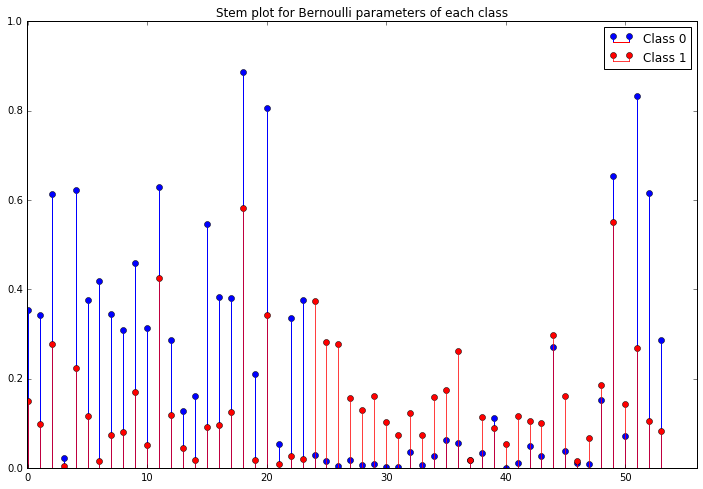

time: 657 ms


In [8]:
plt.figure(figsize=(12,8))

plt.stem(theta_X_1_Bern)
plt.setp(plt.stem(theta_X_0_Bern), linewidth = .75, color ='r')
plt.xlim(-.05,56)
plt.ylim(0,1)
plt.title('Stem plot for Bernoulli parameters of each class')
labels = ['Class 0', 'Class 1']
plt.legend(labels)

plt.show()

## C - KNN Algorithm

In [13]:
# Function to implement K Nearest Neighbours 
def knn_classifier(training_data, train_label,test_data, k):
    
    dist = np.empty([training_data.shape[0],])
    knn_prediction = pd.DataFrame()

    
    for i in range(test_data.shape[0]):
        dist = np.column_stack((dist, np.sum(np.abs(test_data[i,:] - training_data ), axis=1)))

    for i in range(test_data.shape[0]):
        for k in range(1,k+1):
            knn_index = dist[:,i].argsort()[:k]
            training_lables = y_train[knn_index]

            knn_prediction.set_value(i,k, scipy.stats.mode(training_lables)[0][0])
                
    return knn_prediction

time: 18 ms


In [17]:
knn_prediction = knn_classifier(X_train, y_train, X_test, 20)

knn_arr = knn_prediction.values
knn_accuracy = []
for i in range(0,20):
    correct_predict = np.where(knn_arr[:,i] == y_test)[0].shape[0]
    knn_accuracy.append(correct_predict/93)

time: 1.64 s


In [18]:
knn_accuracy

[0.13978494623655913,
 0.16129032258064516,
 0.15053763440860216,
 0.11827956989247312,
 0.11827956989247312,
 0.11827956989247312,
 0.12903225806451613,
 0.15053763440860216,
 0.13978494623655913,
 0.13978494623655913,
 0.16129032258064516,
 0.13978494623655913,
 0.15053763440860216,
 0.12903225806451613,
 0.15053763440860216,
 0.15053763440860216,
 0.15053763440860216,
 0.13978494623655913,
 0.15053763440860216,
 0.16129032258064516,
 0.8709677419354839,
 0.8387096774193549,
 0.8494623655913979,
 0.8817204301075269,
 0.8817204301075269,
 0.8817204301075269,
 0.8709677419354839,
 0.8494623655913979,
 0.8602150537634409,
 0.8602150537634409,
 0.8387096774193549,
 0.8602150537634409,
 0.8494623655913979,
 0.8709677419354839,
 0.8494623655913979,
 0.8494623655913979,
 0.8494623655913979,
 0.8602150537634409,
 0.8494623655913979,
 0.8387096774193549]

time: 5.37 ms


In [ ]:
plt.figure(figsize=(12,8))

plt.plot(knn_accuracy)

plt.xlim([0, 20])
plt.xticks(np.arange(0, 20, 1))

# Chart title
plt.title('kNN prediction accuracy as a function of k')

# D- Logistic Regression - steepest ascent algorithm

In [ ]:
# replacing all 0s with -1
y_train_reg, y_test_reg = y_train, y_test

y_train_reg[y_train_reg == 0] = -1
y_test_reg[y_test_reg == 0] = -1

# add an extra dimesnion to data
X_train_reg = np.concatenate((X_train, np.tile(1, (X_train.shape[0],1))), axis=1)
X_test_reg = np.concatenate((X_test, np.tile(1, (X_test.shape[0],1))), axis=1)